## EU Dev Summit 2022

### Weekly Report

#### Run this cell to connect to your GIS and get started:

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

#### Retrieve all items added since Sunday

In [ ]:
import datetime
today = datetime.datetime.now()
print(today.strftime("%Y-%m-%d %H:%M:%S"))

dayOfWeek = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
sunday = today - datetime.timedelta(dayOfWeek)

start_timestamp = int(sunday.timestamp() * 1000)
end_timestamp = int(today.timestamp() * 1000)

contentPublishedThisWeek = gis.content.search(query=f"created: [{start_timestamp} TO {end_timestamp}]", max_items=50)

print(f"{len(contentPublishedThisWeek)} Items were published this week")

#### Determine the Item Size for each Item

In [ ]:
itemsReport = ""
reportTitle = f"Item size for {len(contentPublishedThisWeek)} items created between {sunday:%m/%d/%Y} and {today:%m/%d/%Y}"
itemsReport += f"{reportTitle}\n\r\r\n"
for publishedItem in contentPublishedThisWeek:
    item = gis.content.get(publishedItem.id)
    itemType = item.type
    itemSizeBytes = item.size
    itemSizeKb = itemSizeBytes/1024
    itemsReport += f"{item.title:<45} {item.id:<40} {itemType:<30} | {itemSizeKb:>20} kb\n\r"

itemsReport

#### Send an email to the active user containing the report

<i>We have not configured an SMTP client on our test server, therefor this line is not active.</i>

In [ ]:
# gis.users.send_notification(users=[gis.users.me], subject=reportTitle, message=itemsReport, type="email")

#### Notification report

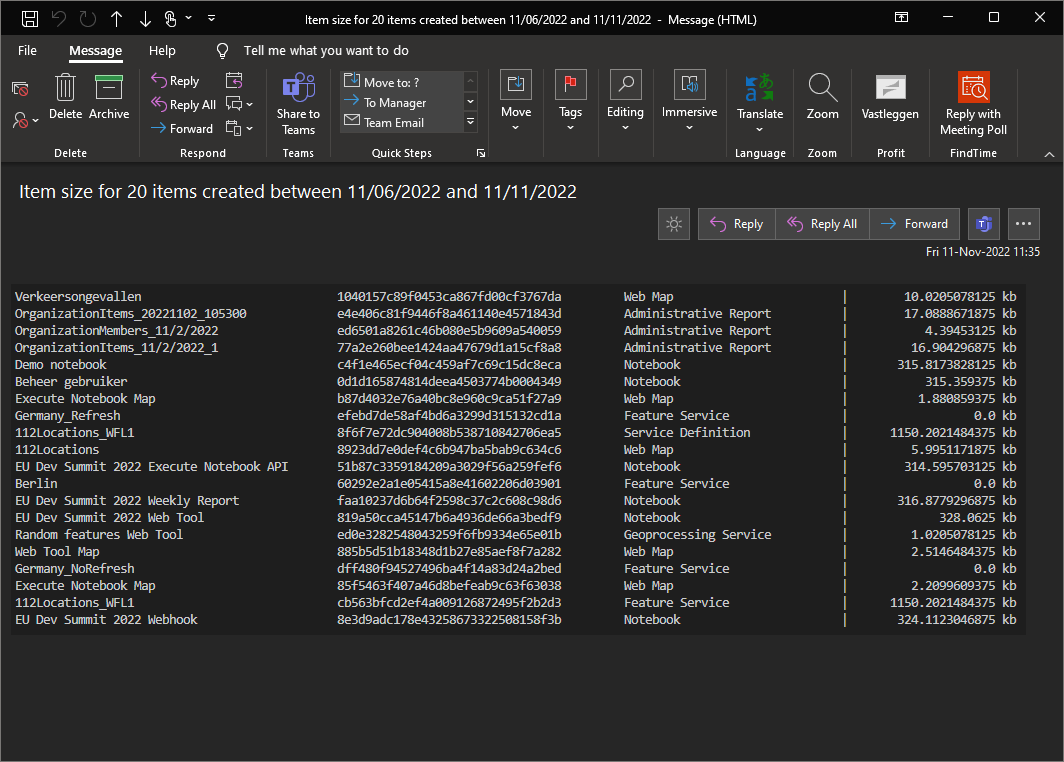